In [2]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.9 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Você sente que a carga de trabalho afeta negativamente sua saúde mental?  \
0                                                SIM                         
1                                                SIM                         
2                                                SIM                         
3                                                NÃO                         
4                                                SIM                         

  Você acredita que recebe apoio adequado da administração escolar para lidar com o estresse?  \
0                                                NÃO                                            
1                                                NÃO                                            
2                                                NÃO                                            
3                                                SIM                                            
4                                             

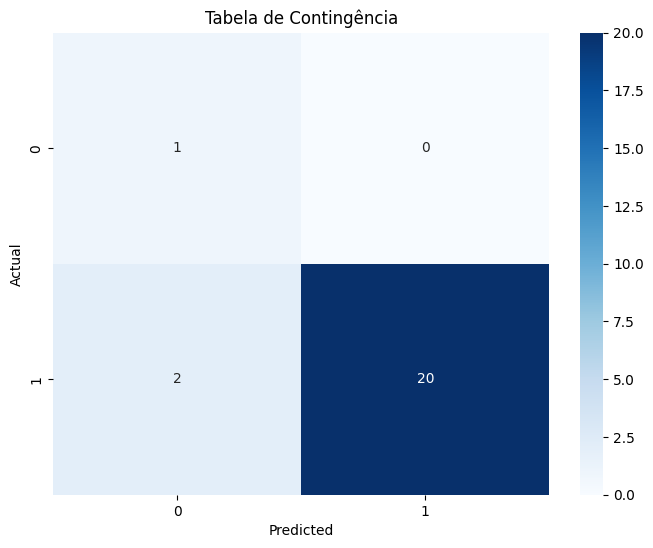

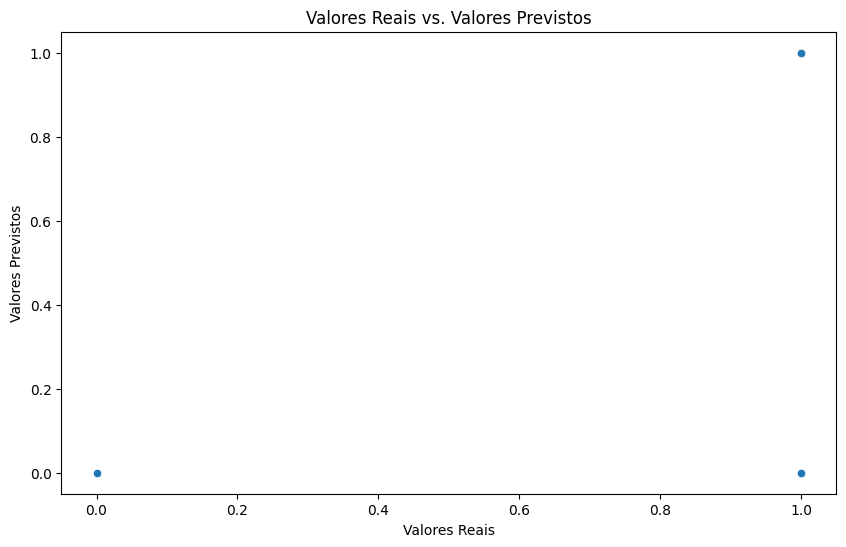

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Carregar os dados do arquivo Excel
file_path = 'C:/Users/jessi/OneDrive/Documentos/Ciência da Computação/5º-Periodo/Inteligencia-Artificial/dados2.xlsx'  # Coloque o caminho correto do arquivo aqui
df = pd.read_excel(file_path)

# Visualizar os dados
print(df.head())

# Remover a coluna de carimbo de data/hora
#df = df.drop(columns=['Carimbo de data/hora'])

# Converter respostas "SIM" e "NÃO" em valores numéricos
df = df.applymap(lambda x: 1 if x == 'SIM' else 0)

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = df.drop(columns=['Você sente que a carga de trabalho afeta negativamente sua saúde mental?'])
y = df['Você sente que a carga de trabalho afeta negativamente sua saúde mental?']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

contingency_table = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print('Tabela de Contingência:')
print(contingency_table)

# Visualizar a tabela de contingência como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Tabela de Contingência')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()


# Evolução do erro (Out-of-Bag Error)
#oob_error = 1 - model.oob_score_

# Gráfico da evolução do erro
#plt.figure(figsize=(10, 6))
#plt.plot(range(1, len(model.estimators_) + 1), [1 - model.oob_score_] * len(model.estimators_), label='Out-of-Bag Error Rate')
#plt.xlabel('Número de Árvores')
#plt.xlabel('Número de Árvores')
#plt.ylabel('Taxa de Erro')
#plt.title('Evolução do Erro Out-of-Bag')
#plt.legend()
#plt.show()

